## ROC 커브 그리기

In [1]:
# 기존에 다루었던 와인데이터 이용

import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' +\
                                    '/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [2]:
# 간단한 decision tree 적용

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Accuray : ', accuracy_score(y_train, y_pred_tr))
print('Test Accuray : ', accuracy_score(y_test, y_pred_test))

Train Accuray :  0.7294593034442948
Test Accuray :  0.7161538461538461


In [3]:
# 분류 모델 평가 지표 구하기

from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, f1_score,
                             roc_auc_score, roc_curve)

print('Accuracy : ', accuracy_score(y_test, y_pred_test))
print('Recall : ', recall_score(y_test, y_pred_test))
print('Precision : ', precision_score(y_test, y_pred_test))
print('AUC score : ', roc_auc_score(y_test, y_pred_test))
print('F1 score : ', f1_score(y_test, y_pred_test))

Accuracy :  0.7161538461538461
Recall :  0.7314702308626975
Precision :  0.8026666666666666
AUC score :  0.7105988470875331
F1 score :  0.7654164017800381


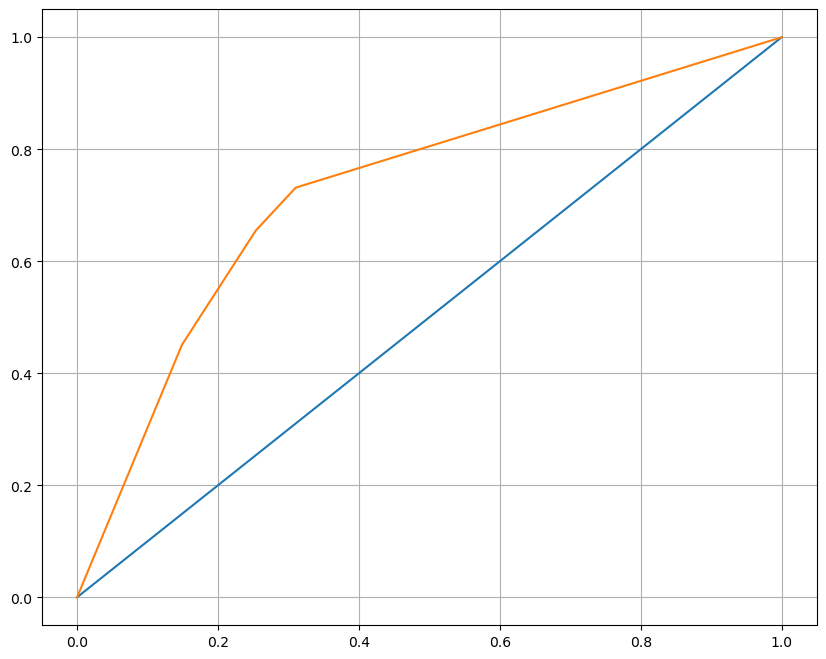

In [4]:
# ROC curve drawing

import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
# 0일 확률과 1일 확률이 array 로 나오기 때문에, 1일 확률만 고르려고 뒤에 slicing 넣어줌

fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1]) # 0, 0 > 1, 1 까지 직선을 넣어 보조 역할해줌
plt.plot(fpr, tpr)
plt.grid()
plt.show()

In [5]:
print(wine_tree.predict_proba(X_test))

[[0.61602594 0.38397406]
 [0.61602594 0.38397406]
 [0.12197802 0.87802198]
 ...
 [0.12197802 0.87802198]
 [0.61602594 0.38397406]
 [0.12197802 0.87802198]]


In [6]:
print(pred_proba)

[0.38397406 0.38397406 0.87802198 ... 0.87802198 0.38397406 0.87802198]


## 다양한 수학 함수

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

### 다항 함수

In [8]:
# 다항 함수 그래프 표현

x = np.linspace(-3, 2, 100) # -3 부터 2까지 일정한 간격으로 100개의 숫자 생성
y = 3 * x **2 + 2

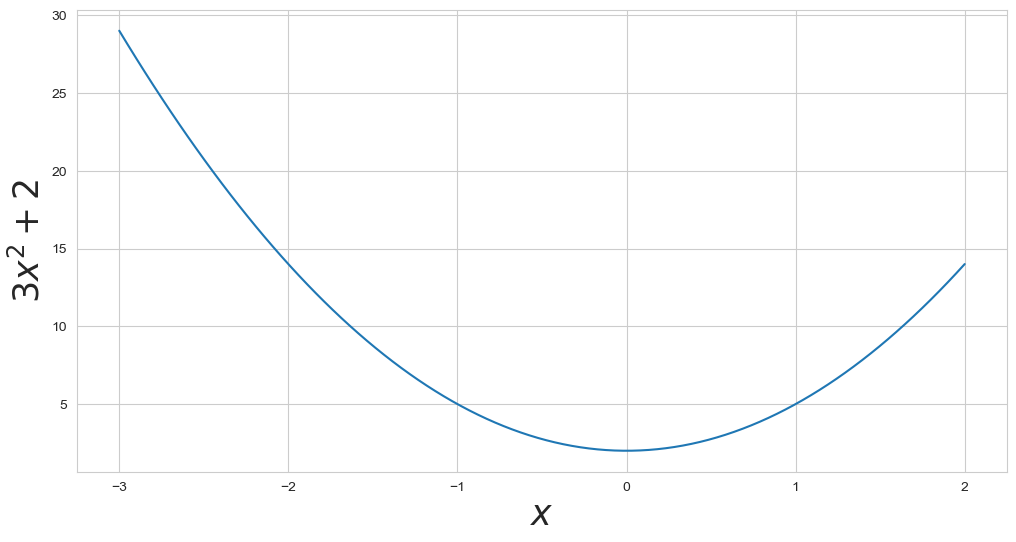

In [9]:
sns.set_style('whitegrid')

plt.figure(figsize=(12, 6))
plt.plot(x,y)
plt.xlabel('$x$', fontsize=25)  # $를 이용하여 수학 기호화 시킴
plt.ylabel('$3x^2 +2$', fontsize=25)
plt.show()


### 다항 함수의 x축 방향 이동

In [10]:
# 다항 함수의 x축 방향 이동

x = np.linspace(-3, 2, 100)
y1 = 3 * x **2 +2
y2 = 3 * (x+1) **2 +2

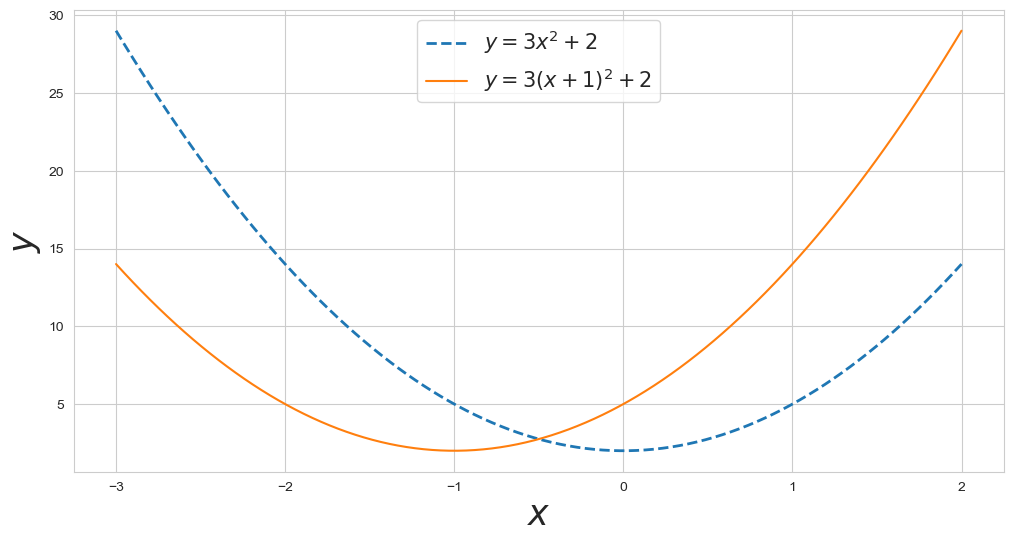

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(x, y1, lw=2, ls='dashed', label='$y=3x^2+2$')
plt.plot(x, y2, label='$y=3(x+1)^2+2$')
plt.legend(fontsize=15)
plt.xlabel('$x$', fontsize=25)
plt.ylabel('$y$', fontsize=25)
plt.show()

### 지수함수

In [12]:
# 지수함수

x = np.linspace(-2, 2, 100)
a11, a12, a13 = 2, 3, 4
y11, y12, y13 = a11**x, a12**x, a13**x

a21, a22, a23 = 1/2, 1/3, 1/4
y21, y22, y23 = a21**x, a22**x, a23**x

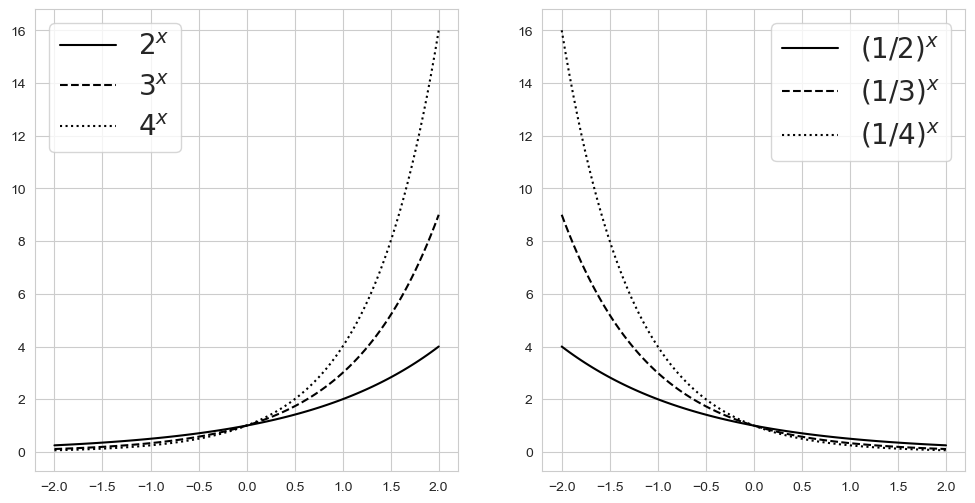

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(x, y11, color='k', label=r"$2^x$")
ax[0].plot(x, y12, '--', color='k', label=r"$3^x$")
ax[0].plot(x, y13, ':', color='k', label=r"$4^x$")
ax[0].legend(fontsize=20)


ax[1].plot(x, y21, color='k', label=r"$(1/2)^x$")
ax[1].plot(x, y22, '--', color='k', label=r"$(1/3)^x$")
ax[1].plot(x, y23, ':', color='k', label=r"$(1/4)^x$")
ax[1].legend(fontsize=20)

plt.show()

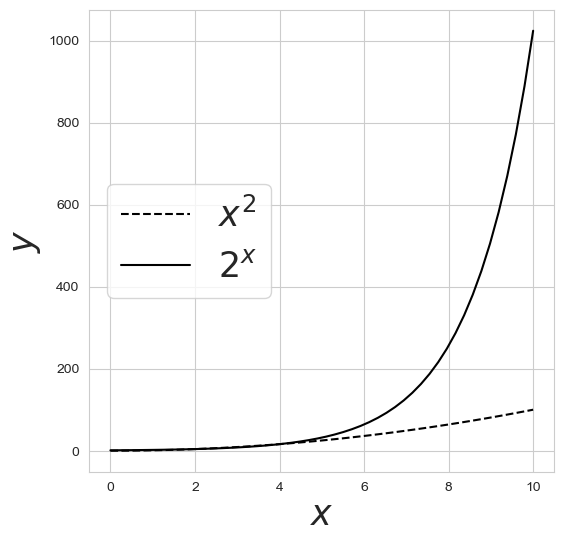

In [14]:
plt.figure(figsize=(6,6))
x = np.linspace(0, 10)

plt.plot(x, x**2, '--', color='k', label=r"$x^2$")
plt.plot(x, 2**x, color='k', label=r"$2^x$")

plt.legend(loc='center left', fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.ylabel('$y$', fontsize=25)

plt.show()

In [15]:
x = np.array([10, 100, 1000, 10000, 100000])
(1+1/x)**x

array([2.59374246, 2.70481383, 2.71692393, 2.71814593, 2.71826824])

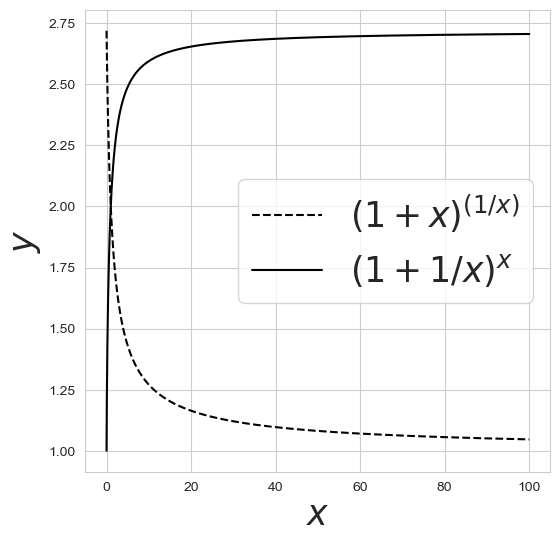

In [31]:
plt.figure(figsize=(6,6))
x = np.linspace(0.0001, 100, 10000)

plt.plot(x, (1+x)**(1/x), '--', color='k', label=r"$(1+x)^{(1/x)}$")
plt.plot(x, (1+1/x)**x, color='k', label=r"$(1+1/x)^x$")

plt.legend(fontsize=25)
plt.xlabel('$x$', fontsize=25)
plt.ylabel('$y$', fontsize=25)

plt.show()

### 로그 함수

In [33]:
# 로그 함수 데이터

def log (x, base):
    return np.log(x) / np.log(base)

x1 = np.linspace(0.0001, 5, 1000)
x2 = np.linspace(0.01, 5, 100)

y11, y12 = log(x1, 10), log(x2, np.e)
y21, y22 = log(x1, 1/10), log(x2, 1/np.e)

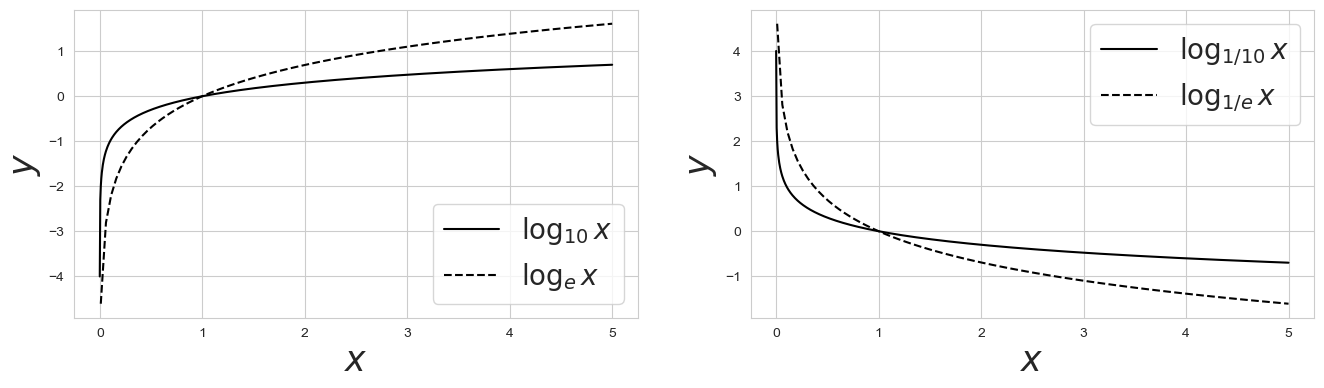

In [36]:
# 위의 데이터를 그래프로 그리기

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(x1, y11, label = r"$\log_{10} x$", color='k')
ax[0].plot(x2, y12, '--', label = r"$\log_{e} x$", color='k')

ax[0].set_xlabel('$x$', fontsize=25)
ax[0].set_ylabel('$y$', fontsize=25)
ax[0].legend(fontsize=20, loc='lower right')

ax[1].plot(x1, y21, label = r"$\log_{1/10} x$", color='k')
ax[1].plot(x2, y22, '--', label = r"$\log_{1/e} x$", color='k')

ax[1].set_xlabel('$x$', fontsize=25)
ax[1].set_ylabel('$y$', fontsize=25)
ax[1].legend(fontsize=20, loc='upper right')

plt.show()

### 시그모이드

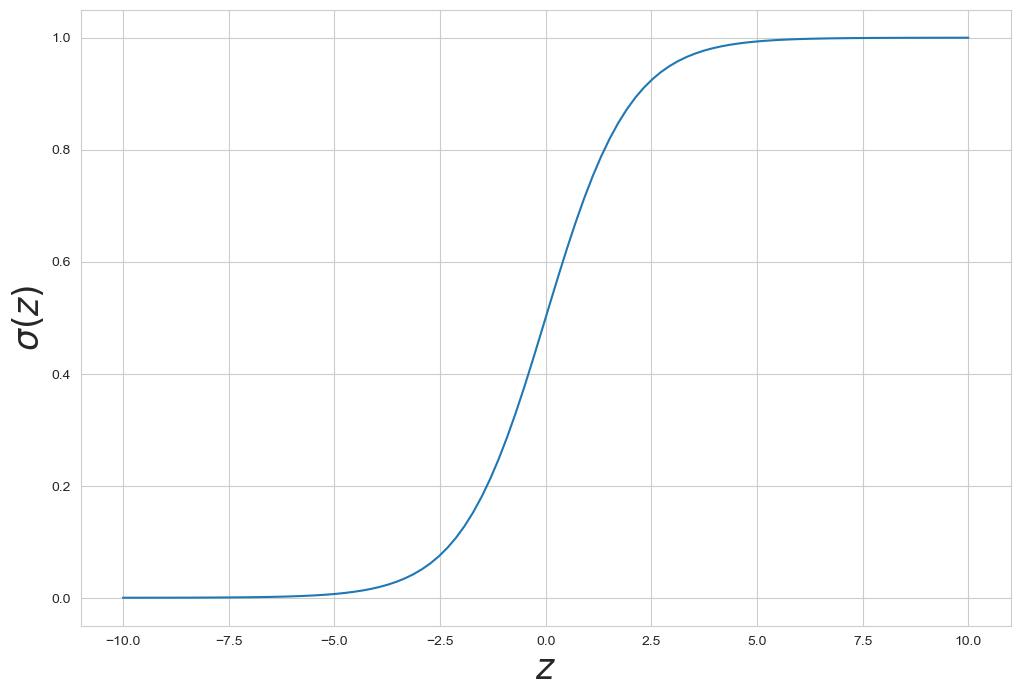

In [37]:
z = np.linspace(-10, 10, 100)
sigma = 1/(1+np.exp(-z))

plt.figure(figsize=(12, 8))
plt.plot(z, sigma)
plt.xlabel('$z$', fontsize = 25)
plt.ylabel('$\sigma(z)$', fontsize = 25)

plt.show()

### 벡터

In [38]:
u = np.linspace(0, 1, 30)
v = np.linspace(0, 1, 30)
U, V = np.meshgrid(u, v) # 두 객체의 갯수 만큼 행렬로 생성 (앞 = 행 방향, 뒤 = 열 방향)
X = U
Y = V
Z = (1+U**2) + (V/(1+V**2))


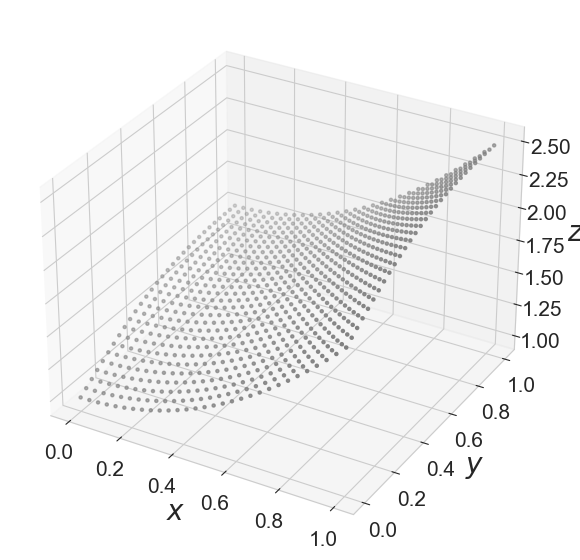

In [43]:
plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)

ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$y$', fontsize=20)
ax.set_zlabel(r'$z$', fontsize=20)

ax.scatter3D(X, Y, Z, marker='.', color='gray')

plt.show()

### 함수의 합성

In [44]:
x = np.linspace(-4, 4, 100)
y = x**3 -15*x + 30 # f(x)
z = np.log(y)       # g(y)

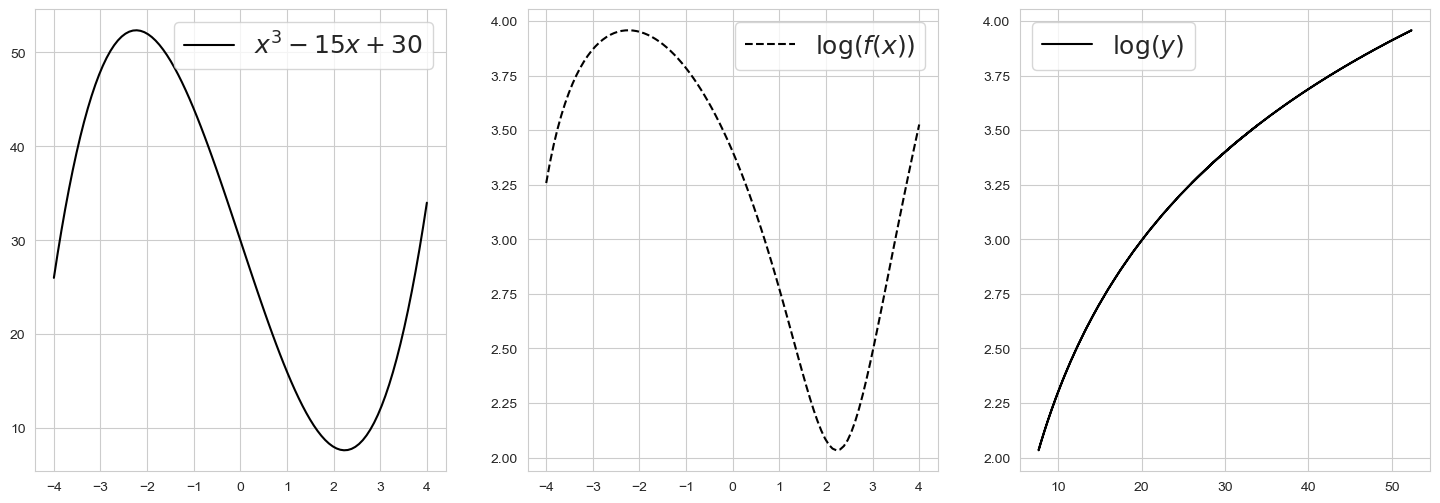

In [52]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].plot(x, y, label=r'$x^3 - 15x + 30$', color='k')
ax[0].legend(fontsize=18)

ax[1].plot(x, z, '--', label=r'$\log(f(x))$', color = 'k')
ax[1].legend(fontsize=18)

ax[2].plot(y, z, label=r'$\log(y)$', color = 'k')
ax[2].legend(fontsize=18)

# ax_tmp = ax[1].twinx() >> 축을 하나 더 만드는 과정 >> 두 개의 그래프 표시 가능
# ax_tmp.plot(x,z, '--', label=r'$\log(f(x))$', color = 'k')

plt.show()

### Boxplot
* matplot 으로 그려보기
* seaborn 으로 그려보기

In [59]:
samples = [1, 7, 9, 16, 36, 39, 45, 45, 46, 48, 51, 100, 101]
tmp_y = [1]*len(samples)

In [54]:
# boxplot 위치 지정을 위한 1 생성
# 여러 boxplot을 넣고 싶다면 tmp_y와 같은 것을 여러 개 생성, 다른 값을 부여 하면 됨
# eg. tmp_z = [3] * len(samples_2)...etc

tmp_y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

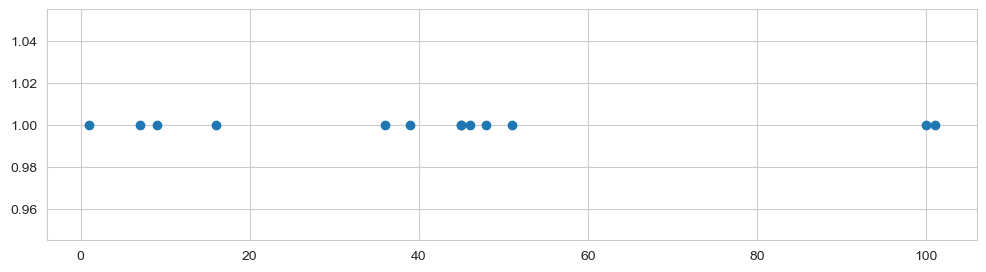

In [70]:
# 가로 boxplot

plt.figure(figsize=(12, 3))
plt.scatter(samples, tmp_y)
plt.grid(True)
plt.show()

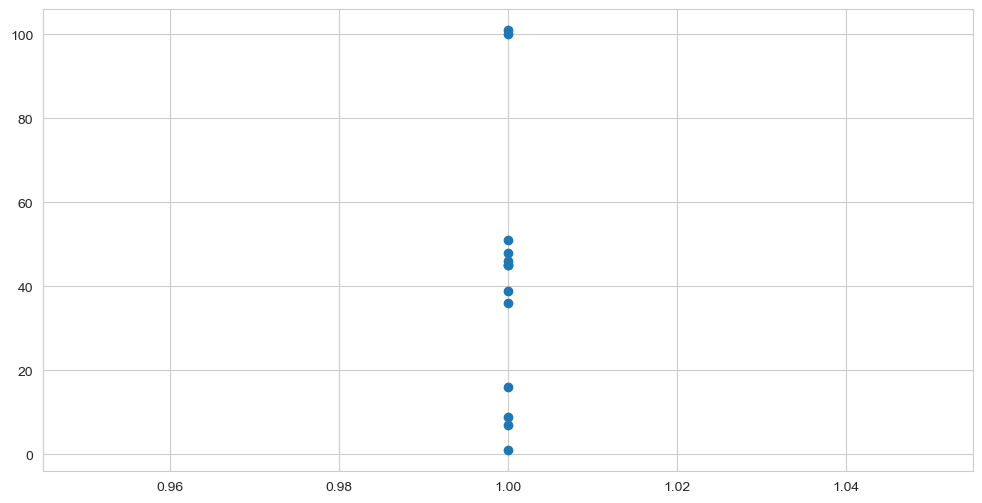

In [61]:
# 세로 boxplot

plt.figure(figsize=(12, 6))
plt.scatter(tmp_y, samples)
plt.grid(True)
plt.show()

In [65]:
# boxplot 특정 지표 확인

med = np.median(samples)
tf_per = np.percentile(samples, 25)
sf_per = np.percentile(samples, 75)
IQR = sf_per - tf_per
IQR_one_half = IQR * 1.5

print(f'median: {med}\n25% percentile: {tf_per}\n75% percentile: {sf_per}\ninterquartile range: {IQR}')

median: 45.0
25% percentile: 16.0
75% percentile: 48.0
interquartile range: 32.0


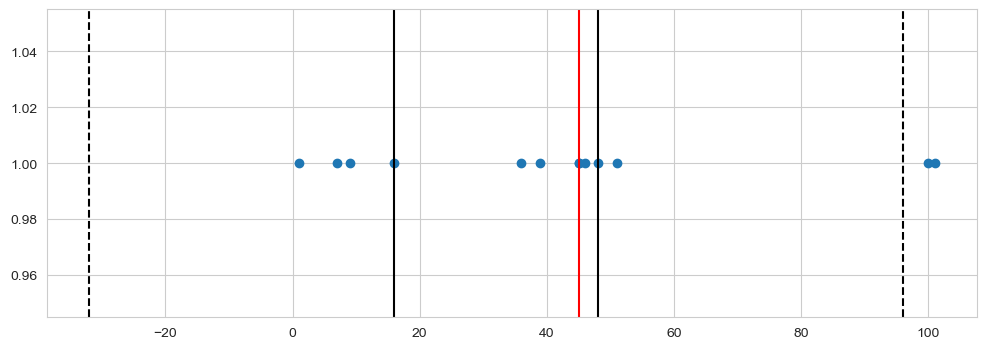

In [66]:
q1 = np.percentile(samples, 25)
q2 = np.median(samples)
q3 = np.percentile(samples, 75)
upper_fence = q3 + IQR*1.5
lower_fence = q1 - IQR*1.5

plt.figure(figsize=(12, 4))
plt.scatter(samples, tmp_y)
plt.axvline(x=q1, color='black')
plt.axvline(x=q2, color='red')
plt.axvline(x=q3, color='black')
plt.axvline(x=upper_fence, color='black', ls='dashed')
plt.axvline(x=lower_fence, color='black', ls='dashed')
plt.grid(True)
plt.show()

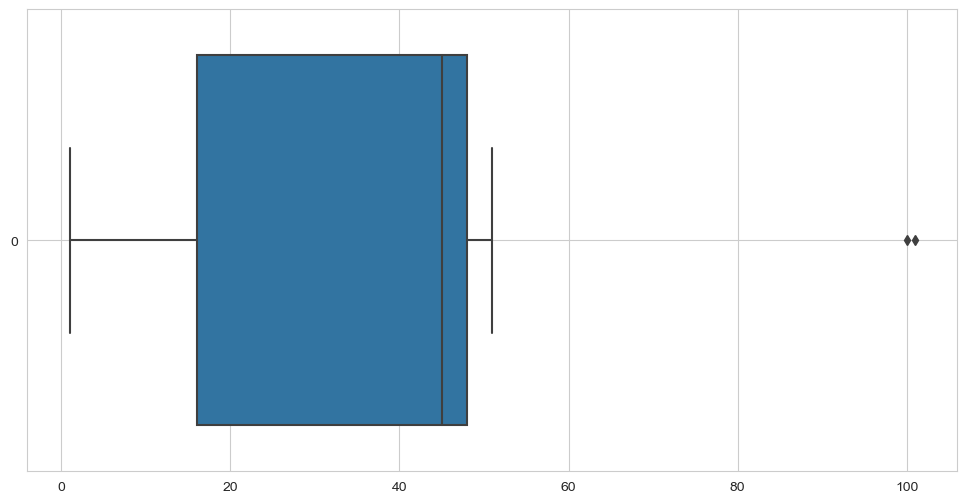

In [69]:
# seaborn을 이용한 간편한 boxplot 그리기

import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(samples, orient='h')
plt.grid(True)
plt.show()